# Audio Processing Notebook:

In [156]:
import librosa, librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq, ifft
import soundfile
import whisper

# Task 1 - Audio Processing 
- Exploring the librosa library (Reference: https://musicinformationretrieval.com/ipython_audio.html#Jupyter-Audio-Basics)
- reverse the audio 
- speeding up the audio

In [ ]:
x, sr = librosa.load("Task_1/T1_audio.wav") 
# x is a numpy array of the wav file, sr = sample rate
# note that load enables target sampling and sr = 22050 by default
# x.shape to get length of the audio array 
# librosa.get_samplerate("Task_1/T1_audio.wav") to get actual sample rate of audio

In [ ]:
# Reversing the audio
reversed_audio = x[::-1]
ipd.Audio(reversed_audio, rate=sr)

In [ ]:
# Speeding up the audio
fast_audio = librosa.effects.time_stretch(reversed_audio, rate=2.0)
ipd.Audio(fast_audio, rate=sr)

We can now hear clearly: 67.9222° N, 26.5046° E, Lapland. Home to the indigenous Sami people. 

# Task 2 - Visualising Audio
1. Plotting waveform
2. Plotting frequency spectrum

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr) # waveshow is used instead of waveplot 
# error encountered: '_process_plot_var_args' object has no attribute 'prop_cycler'

Text(0.5, 1.0, 'Task_2/T2_audio_d.wav')

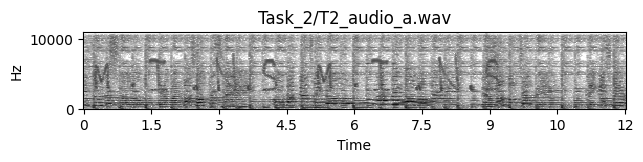

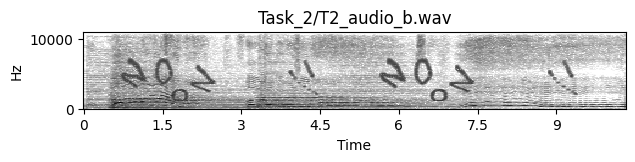

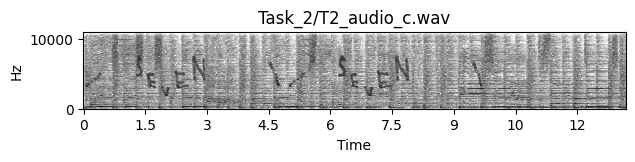

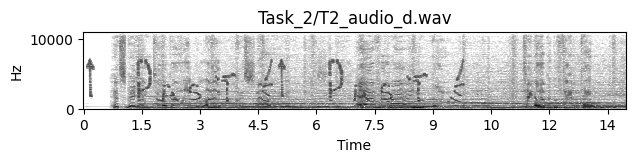

In [42]:
x, sr = librosa.load("Task_2/T2_audio_a.wav") 
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(7, 1))
librosa.display.specshow(Xdb, cmap='gray_r', sr=sr, x_axis='time', y_axis='hz')
plt.title("Task_2/T2_audio_a.wav")

x, sr = librosa.load("Task_2/T2_audio_b.wav") 
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(7, 1))
librosa.display.specshow(Xdb, cmap='gray_r', sr=sr, x_axis='time', y_axis='hz')
plt.title("Task_2/T2_audio_b.wav")

x, sr = librosa.load("Task_2/T2_audio_c.wav") 
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(7, 1))
librosa.display.specshow(Xdb, cmap='gray_r', sr=sr, x_axis='time', y_axis='hz')
plt.title("Task_2/T2_audio_c.wav")

x, sr = librosa.load("Task_2/T2_audio_d.wav") 
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(7, 1))
librosa.display.specshow(Xdb, cmap='gray_r', sr=sr, x_axis='time', y_axis='hz')
plt.title("Task_2/T2_audio_d.wav")

This shows seven minutes past noon i.e. 12:07

# Task 3 - Fast Fourier Transform
1. Using fft from scipy library, referencing: https://realpython.com/python-scipy-fft/#using-the-fast-fourier-transform-fft
2. Plotting frequency spectrum

Sample rate: 22050, Duration: 8.732879818594105


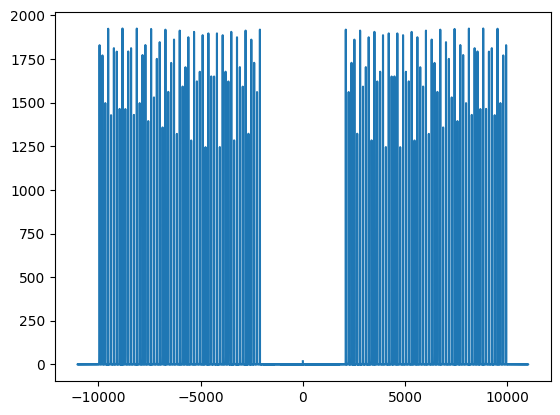

In [134]:
# Apply FFT to the audio signal
x, sr = librosa.load("Task_3/C.Noisy_Voice.wav") #, sr=SAMPLE_RATE) 
duration = librosa.get_duration(y=x, sr=sr)
yf = fft(x)
xf = fftfreq(len(x), 1 / sr) # generate x axis using approx center of bins in output of fft()
print(f"Sample rate: {sr}, Duration: {duration}")
plt.plot(xf, np.abs(yf))
plt.show()

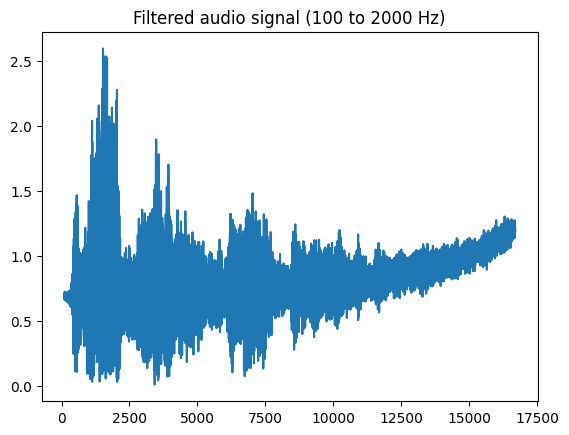

In [135]:
# Attempt to manually audio signals to keep data between 100 and 2000 Hz
# This is WRONG because it is important to use windowing techniques to maintain the conjugate symmetery of the FFT output
filter_range = np.where((xf >= 100) & (xf <= 2000))
filtered_yf = np.abs(yf)[filter_range]
plt.plot(tuple(range(100, len(filtered_yf)+100)), filtered_yf)
plt.title("Filtered audio signal (100 to 2000 Hz)")
plt.show()

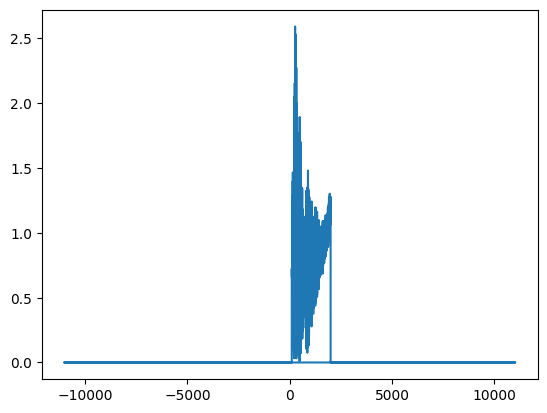

In [155]:
# This accounts for complex conjugate symmetry for real-valued signals
low_freq, high_freq = 100, 2000
frequencies = xf
filtered_fft = yf
filtered_fft[(frequencies < low_freq) | (frequencies > high_freq)] = 0
filtered_fft[(frequencies > 0) & (frequencies < low_freq)] = np.conj(filtered_fft[(frequencies > 0) & (frequencies < low_freq)])
filtered_fft[(frequencies > high_freq)] = np.conj(filtered_fft[(frequencies > high_freq)])

plt.plot(xf, np.abs(filtered_fft))

In [143]:
filtered_fft_audio = ifft(filtered_fft).real # ensure only the real component is used
ipd.Audio(filtered_fft_audio, rate=sr)

In [146]:
# Save signal to file
# librosa.output.write_wav('../Task_3/Filtered_Voice.wav', filtered_audio, sr) - this has been deprecated
soundfile.write(file='Task_3/Filtered_Voice.wav', data=filtered_fft_audio, samplerate=sr)

In [147]:
# Check that saved file is correct
filtered_audio_from_save, sr = librosa.load("Task_3/Filtered_Voice.wav") 
ipd.Audio(filtered_audio_from_save, rate=sr)

In [153]:
# Increase loudness of audio by 50%
gain = 1.5
max_amplitude = np.max(np.abs(filtered_audio_from_save))
normalized_audio = gain * filtered_audio_from_save / max_amplitude 
scaled_audio = np.int16(normalized_audio * 32767)

ipd.Audio(scaled_audio, rate=sr)
soundfile.write(file='Task_3/Filtered_Voice_Amplified.wav', data=scaled_audio, samplerate=sr)

In [154]:
model = whisper.load_model("large-v2")
result = model.transcribe('Task_3/Filtered_Voice_Amplified.wav')
print(result["text"])

100%|█████████████████████████████████████| 2.87G/2.87G [05:55<00:00, 8.68MiB/s]
/opt/homebrew/lib/python3.11/site-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Senin için buradayım. Beni içeri al, sadece birbirimize sahibiz. Sadece sen ve ben. Ne yapacağız? Kardan adam yapmak ister misin?


### Open AI text result: 
Senin için buradayım. Beni içeri al, sadece birbirimize sahibiz. Sadece sen ve ben. Ne yapacağız? Kardan adam yapmak ister misin?

#### Google Translate results from Turkish (detected) to English
I'm here for you. Let me in, we only have each other. Only you and me. What are we going to do? Do you want to make a snowman?

#### Results:
From inference, this is the lyrics from "Do You Want to Build a Snowman". Since we are supposed to guess an object, the answer is Snowman (taking hints from the title as mentioned)